In [2]:
import pandas as pd
import numpy as np
import sys 
import datetime
import os
import matplotlib as plt
import seaborn as sns

%matplotlib inline

## Make some simple visualizations of the raw data

In [2]:
df_raw = pd.read_csv('C:/Workspace/TNC-Demand-Model/Inputs/Chicago Ride-Hailing/2019_Trip_Records_No_Suppressed.csv')

rh_final = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/2019_Weekday_Ridehail.csv')

#or

#rh_final = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/2019_Weekday_Yearly_Ridehail_TOD.csv')

NameError: name 'pd' is not defined

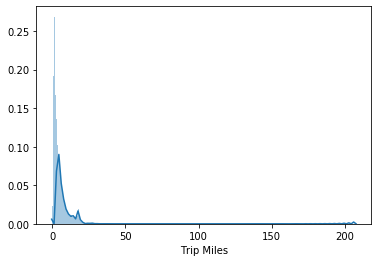

In [41]:
sns.distplot(df_raw["Trip Miles"], bins = np.arange(0, 50, 0.5).tolist())

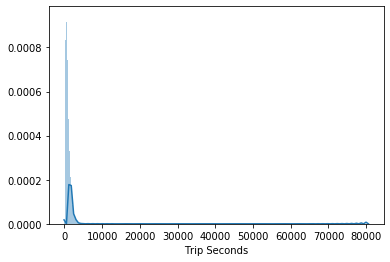

In [42]:
sns.distplot(df_raw['Trip Seconds'], bins = np.arange(0, 7200, 60).tolist())

In [43]:
df_raw['Fare'].max()

380.0

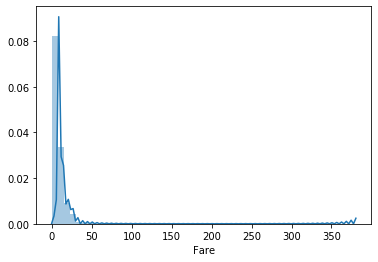

In [44]:
sns.distplot(df_raw['Fare'])

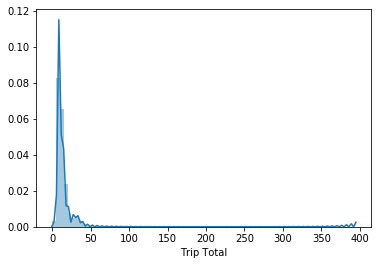

In [45]:
#this is the total trips distribution
sns.distplot(df_raw['Trip Total'], bins = np.arange(0, 210, 5).tolist())

# Make some TOD visualizations
### for proposal ppt

* 1 - 10pm-6am
* 2 - 6am-9am
* 3 - 9am-4pm
* 4 - 4pm-7pm
* 5 - 7pm-10pm

In [47]:
df_raw['ALL_TRIPS_NO_SUPPRESSED'] = df_raw.PRIVATE_TRIPS + df_raw.SHARED_TRIPS

In [48]:
tod_sum_df = df_raw.groupby(by = 'TOD', as_index = False).sum()

In [49]:
#this is total number of trips for each TOD
#I add in the suppressed trips down below... use that graph


#tod_sum_df.plot(kind = 'bar', x = 'TOD', y = 'ALL_TRIPS_NO_SUPPRESSED')

In [50]:
tod_avg_df = df_raw.groupby(by = 'TOD', as_index = False).mean()

In [51]:
#this is average number of trips for each OD pair within each TOD
#doesnt work right with the raw data... all are 1
#tod_avg_df.plot(kind = 'bar', x = 'TOD', y = 'ALL_TRIPS_NO_SUPPRESSED')

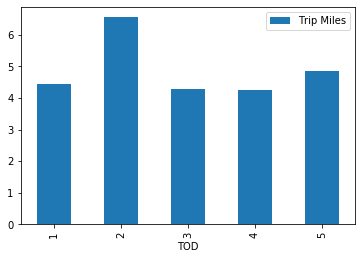

In [52]:
tod_avg_df.plot(kind = 'bar', x = 'TOD', y = 'Trip Miles')

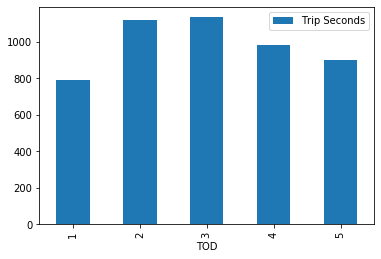

In [53]:
tod_avg_df.plot(kind = 'bar', x = 'TOD', y = 'Trip Seconds')

In [54]:
df_filtered = df_raw[df_raw['Trip Seconds'] <= 7200]
df_filtered = df_filtered[df_filtered['Trip Miles'] <= 50]

In [55]:
tod_df = pd.DataFrame()
variables = ['Trip Miles', 'Trip Seconds']

In [56]:
#generate stats for TOD stats table for proposal
for var in variables:   
    tod_df['TOD'] = tods
    min_col = df_filtered[[var, 'TOD']].groupby(by = 'TOD', as_index = False).min()
    tod_df['Min'] = min_col[var]

    max_col = df_filtered[[var, 'TOD']].groupby(by = 'TOD', as_index = False).max()
    tod_df['Max'] = max_col[var]

    avg_col = df_filtered[[var, 'TOD']].groupby(by = 'TOD', as_index = False).mean()
    tod_df['Average'] = avg_col[var]

    sum_col = df_filtered[[var, 'TOD']].groupby(by = 'TOD', as_index = False).sum()
    tod_df['Sum'] = sum_col[var]

    tod_df.to_csv(var +'_stats.csv')

In [57]:
# do the trip totals with the processed data so that it includes suppressed data and processed into average weekday 
## 
var = 'ALL_TRIPS'

tod_df['TOD'] = tods

min_col = df_final[[var, 'TOD']].groupby(by = 'TOD', as_index = False).min()
tod_df['Min'] = min_col[var]

max_col = df_final[[var, 'TOD']].groupby(by = 'TOD', as_index = False).max()
tod_df['Max'] = max_col[var]

avg_col = df_final[[var, 'TOD']].groupby(by = 'TOD', as_index = False).mean()
tod_df['Average'] = avg_col[var]

sum_col = df_final[[var, 'TOD']].groupby(by = 'TOD', as_index = False).sum()
tod_df['Sum'] = sum_col[var]

tod_df.to_csv(var +'_stats.csv')

# Make some DOW visualizations
### for proposal ppt

In [43]:
df_raw.DOW.unique()

array([4, 2, 1, 3, 0], dtype=int64)

In [45]:
variables = ['Trip Miles', 'Trip Seconds', 'ALL_TRIPS_NO_SUPPRESSED']

In [46]:
#generate stats for TOD stats table for proposal
for var in variables:   
    tod_df['TOD'] = tods
    min_col = df_filtered[[var, 'DOW']].groupby(by = 'DOW', as_index = False).min()
    tod_df['Min'] = min_col[var]

    max_col = df_filtered[[var, 'DOW']].groupby(by = 'DOW', as_index = False).max()
    tod_df['Max'] = max_col[var]

    avg_col = df_filtered[[var, 'DOW']].groupby(by = 'DOW', as_index = False).mean()
    tod_df['Average'] = avg_col[var]

    sum_col = df_filtered[[var, 'DOW']].groupby(by = 'DOW', as_index = False).sum()
    tod_df['Sum'] = sum_col[var]

    tod_df.to_csv(var +'_stats.csv')

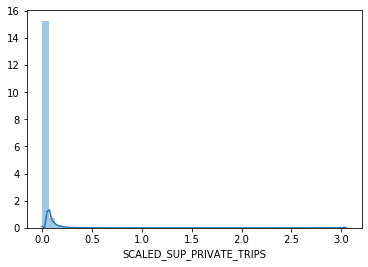

In [45]:
sns.distplot(df_final['SCALED_SUP_PRIVATE_TRIPS'])

In [50]:
sup_trips.SCALED_SUP_PRIVATE_TRIPS.max()

3.051531195980953

In [74]:
#the outlier OD-tods with more than 100 trips are all going to (most during am) or coming from (most during pm) the downtown core
df_final[df_final['ALL_TRIPS'] >100][['Pickup Census Tract', 'Dropoff Census Tract','TOD','Trip Miles']].astype(str)

,Pickup Census Tract,Dropoff Census Tract,TOD,Trip Miles
172496,17031081403.0,17031839100.0,3,1.6339446653505498
172789,17031081500.0,17031839100.0,3,1.3513655163307625
173278,17031081700.0,17031839100.0,3,1.0472676449888945
173552,17031081800.0,17031839100.0,3,1.2225135768323332
198110,17031320100.0,17031839100.0,3,1.2461411679778813
198924,17031330100.0,17031839100.0,3,2.113814056423688
221541,17031833100.0,17031839100.0,3,1.5283543180868921
314103,17031081800.0,17031839100.0,5,1.1832413484579511
344028,17031320100.0,17031839100.0,5,1.0860636299188182
370728,17031833000.0,17031839100.0,5,1.470509705911243


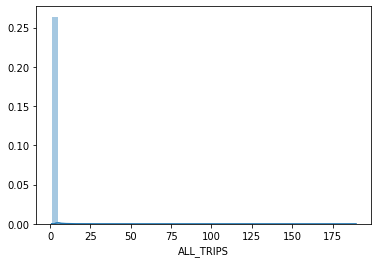

In [44]:
sns.distplot(df_final['ALL_TRIPS'])

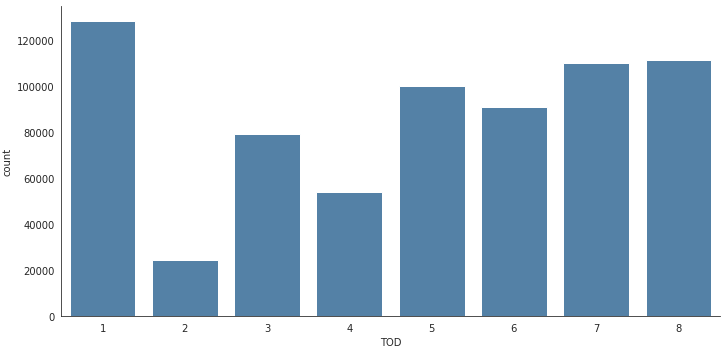

In [81]:
with sns.axes_style('white'):
    g = sns.factorplot("TOD", data=df_final[['ALL_TRIPS','TOD']], aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=1)

In [94]:
tod_sum_df = df_final.groupby(by = 'TOD', as_index = False).sum()

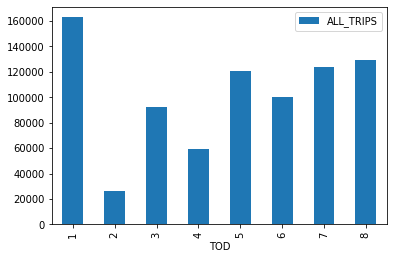

In [99]:
#this is total number of trips for each TOD
tod_sum_df.plot(kind = 'bar', x = 'TOD', y = 'ALL_TRIPS')

In [103]:
tod_avg_df = df_final.groupby(by = 'TOD', as_index = False).mean()

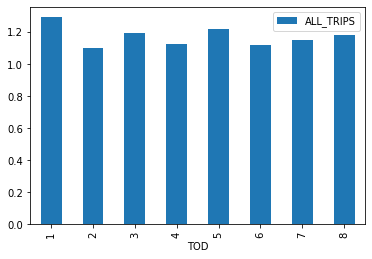

In [104]:
#this is average number of trips for each OD pair within each TOD
tod_avg_df.plot(kind = 'bar', x = 'TOD', y = 'ALL_TRIPS')

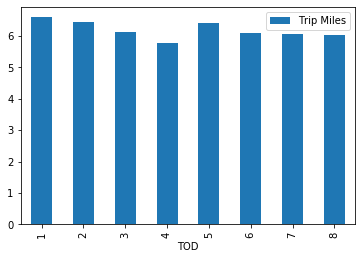

In [105]:
tod_avg_df.plot(kind = 'bar', x = 'TOD', y = 'Trip Miles')

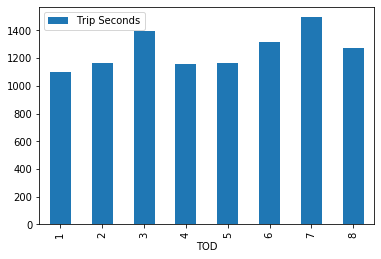

In [106]:
tod_avg_df.plot(kind = 'bar', x = 'TOD', y = 'Trip Seconds')